### Importación de datos



In [52]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [53]:
calificacion = [tienda.Precio.sum(), tienda2.Precio.sum() , tienda3.Precio.sum() ,tienda4.Precio.sum()]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3','Tienda 4']

datos = list(zip(tiendas, calificacion))
df_ingreso_total= pd.DataFrame(datos, columns=["Tiendas", "Ingreso Total"])
df_ingreso_total

,Tiendas,Ingreso Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


<Axes: xlabel='Tiendas', ylabel='Miles de Millones MXN'>

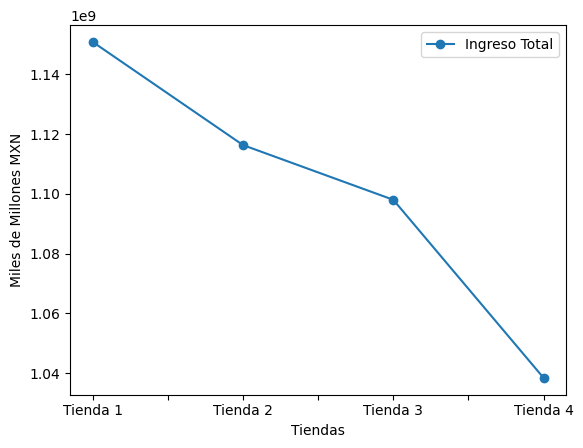

In [54]:
df_ingreso_total.set_index('Tiendas',inplace=True)
df_ingreso_total.plot(kind = 'line', linestyle='-', marker= 'o', ylabel= 'Miles de Millones MXN')

# 2. Ventas por categoría

In [55]:
df_categorias = pd.concat([
    tienda['Categoría del Producto'].value_counts(),
    tienda2['Categoría del Producto'].value_counts(),
    tienda3['Categoría del Producto'].value_counts(),
    tienda4['Categoría del Producto'].value_counts()
], axis=1)
df_categorias.columns = ['Tienda 1','Tienda 2', 'Tienda 3', 'Tienda 4']
df_categorias

,Tienda 1,Tienda 2,Tienda 3,Tienda 4
Categoría del Producto,,,,
Muebles,465,442,499,480
Electrónicos,448,422,451,451
Juguetes,324,313,315,338
Electrodomésticos,312,305,278,254
Deportes y diversión,284,275,277,277
Instrumentos musicales,182,224,177,170
Libros,173,197,185,187
Artículos para el hogar,171,181,177,201


<Axes: ylabel='Categoría del Producto'>

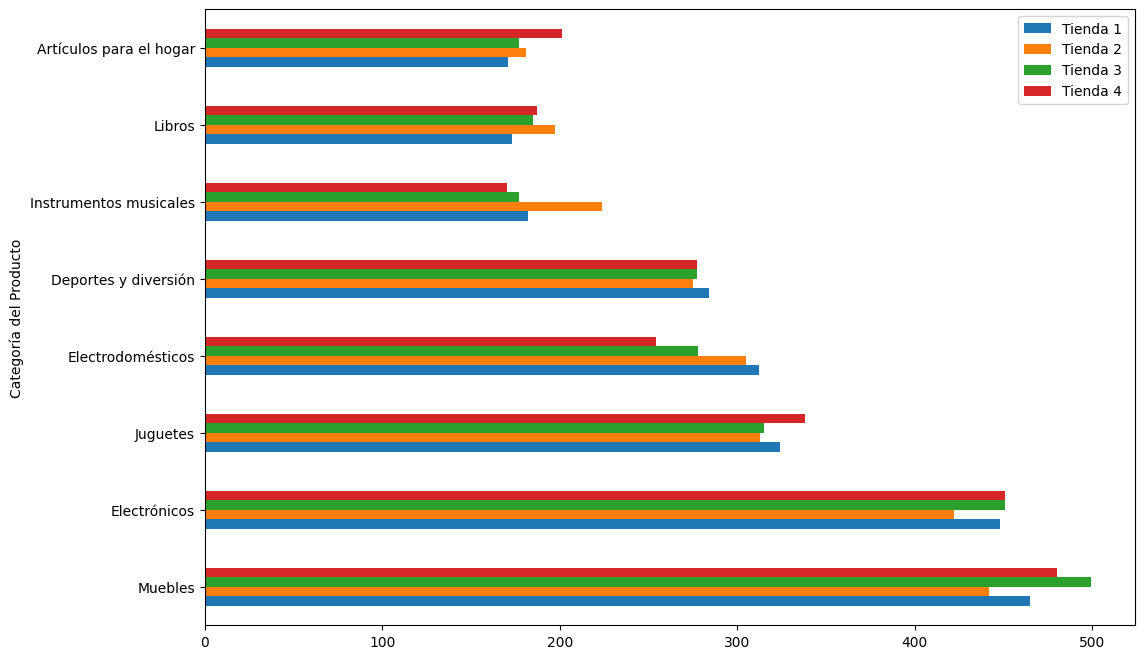

In [56]:
df_categorias.plot(kind= 'barh', figsize = (12,8))

# 3. Calificación promedio de la tienda


In [57]:
calificacion = [tienda['Calificación'].mean(), tienda2['Calificación'].mean() , tienda3['Calificación'].mean() ,tienda4['Calificación'].mean()]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3','Tienda 4']

datos = list(zip(tiendas, calificacion))
df_calificacion = pd.DataFrame(datos, columns=["Tiendas", "Calificacion"])

df_calificacion.set_index("Tiendas", inplace=True)
df_calificacion

,Calificacion
Tiendas,
Tienda 1,3.976685
Tienda 2,4.037304
Tienda 3,4.048326
Tienda 4,3.995759


<Axes: xlabel='Tiendas'>

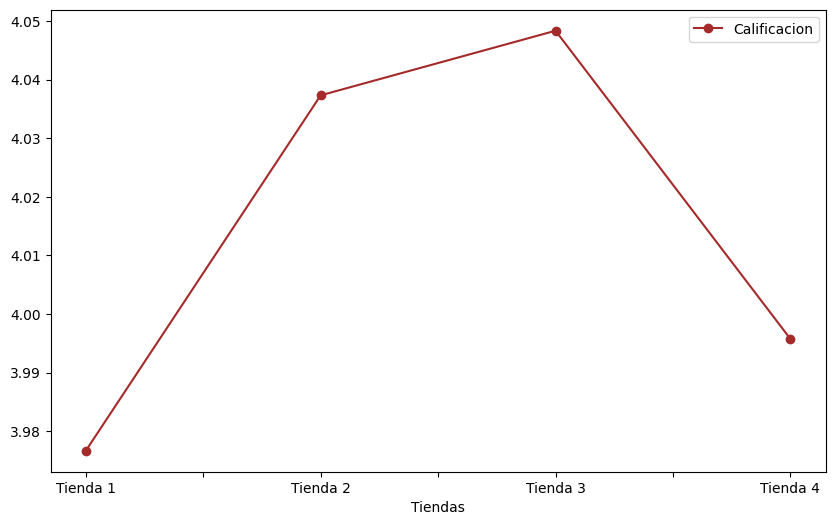

In [58]:
df_calificacion.plot(kind = 'line', figsize=(10,6), marker = 'o', color='brown')

# 4. Productos más y menos vendidos

###Tienda 1

In [59]:
df_1_prod = tienda['Producto'].value_counts().sort_values()
print('Productos menos vendidos Tienda 1')
df_1_prod.head()

Productos menos vendidos Tienda 1


,count
Producto,
Auriculares con micrófono,33
Celular ABXY,33
Olla de presión,35
Pandereta,36
Mochila,39


In [60]:
print('Productos mas vendidos Tienda 1')
df_1_prod.tail()


Productos mas vendidos Tienda 1


,count
Producto,
Bloques de construcción,56
Secadora de ropa,58
Armario,60
TV LED UHD 4K,60
Microondas,60


###Tienda 2

In [61]:
df_2_prod = tienda2['Producto'].value_counts().sort_values()
print('Productos menos vendidos Tienda 2')
df_2_prod.head()

Productos menos vendidos Tienda 2


,count
Producto,
Juego de mesa,32
Mesa de comedor,34
Impresora,34
Sillón,35
Auriculares,37


In [62]:
print('Productos mas vendidos Tienda 2')
df_2_prod.tail()

Productos mas vendidos Tienda 2


,count
Producto,
Guitarra acústica,58
Pandereta,58
Batería,61
Microondas,62
Iniciando en programación,65


###Tienda 3

In [63]:
df_3_prod = tienda3['Producto'].value_counts().sort_values()
print('Productos menos vendidos Tienda 3')
df_3_prod.head()

Productos menos vendidos Tienda 3


,count
Producto,
Bloques de construcción,35
Microondas,36
Set de vasos,36
Mochila,36
Vaso térmico,38


In [64]:
print('Productos mas vendidos Tienda 3')
df_3_prod.tail()

Productos mas vendidos Tienda 3


,count
Producto,
Set de ollas,55
Mesa de noche,55
Mesa de comedor,56
Cama king,56
Kit de bancas,57


###Tienda 4

In [65]:
df_4_prod = tienda4['Producto'].value_counts().sort_values()
print('Productos menos vendidos Tienda 4')
df_4_prod.head()

Productos menos vendidos Tienda 4


,count
Producto,
Guitarra eléctrica,33
Armario,34
Guitarra acústica,37
Ciencia de datos con Python,38
Lavadora de ropa,38


In [66]:
print('Productos mas vendidosTienda 4')
df_4_prod.tail()

Productos mas vendidosTienda 4


,count
Producto,
Carrito de control remoto,55
Dashboards con Power BI,56
Cama king,56
Cubertería,59
Cama box,62


# 5. Envío promedio por tienda

In [67]:
calificacion = [tienda['Costo de envío'].mean(), tienda2['Costo de envío'].mean() , tienda3['Costo de envío'].mean() ,tienda4['Costo de envío'].mean()]
tiendas = ['Tienda 1', 'Tienda 2', 'Tienda 3','Tienda 4']

datos = list(zip(tiendas, calificacion))
df_envio_prom = pd.DataFrame(datos, columns=["Tiendas", "Costo de envío Promedio"])
df_envio_prom

,Tiendas,Costo de envío Promedio
0,Tienda 1,26018.609580
1,Tienda 2,25216.235693
2,Tienda 3,24805.680373
3,Tienda 4,23459.457167


<Axes: xlabel='Tiendas'>

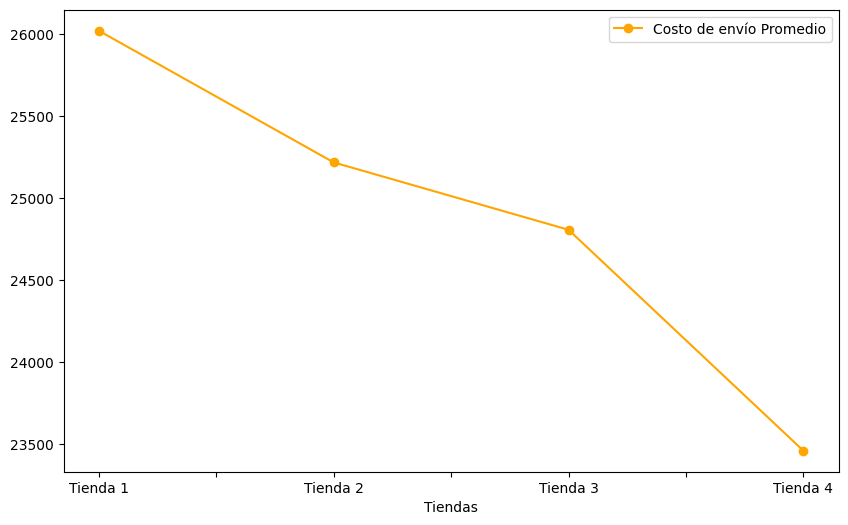

In [68]:
df_envio_prom.set_index("Tiendas", inplace=True)
df_envio_prom.plot(kind= 'line', figsize = (10,6), marker='o', color='orange')

##Desafío:

Utilice los datos de latitud (lat) y longitud (lon) para mapear las ventas de cada tienda y analizar la distribución geográfica de los productos vendidos.

Genere gráficos de dispersión o mapas de calor (Heatmaps) para visualizar datos e identificar áreas con la mayor concentración de ventas.

Explore si algunas tiendas tienen un rendimiento superior o inferior al esperado en determinadas regiones e identifique si existen patrones geográficos que puedan influir en el rendimiento de las tiendas.

Sugerencias:

Puede utilizar la biblioteca Matplotlib para gráficos de dispersión o incluso integrarla con otras bibliotecas como Folium para generar mapas interactivos si desea ir más allá.

Analice cómo las variables geográficas influyen en los ingresos y las calificaciones de las tiendas.

In [69]:
df_extra = tienda[['lat','lon']]
df_extra2 = tienda2[['lat','lon']]
df_extra3 = tienda3[['lat','lon']]
df_extra4 = tienda4[['lat','lon']]

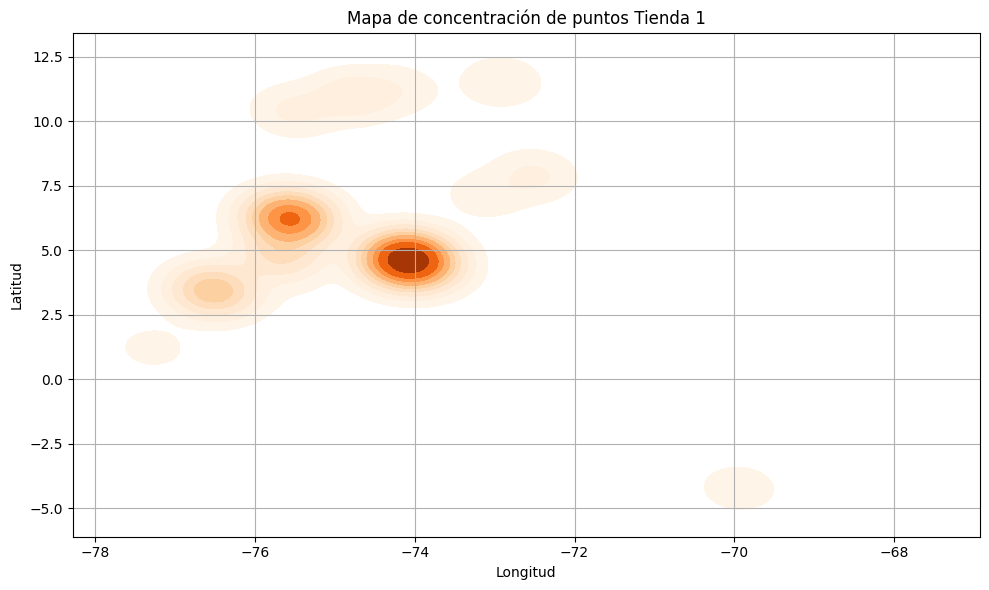

In [70]:
plt.figure(figsize=(10, 6))

# Crear el mapa de calor tipo scatter density
sns.kdeplot(
    data=df_extra,
    x='lon', y='lat',
    fill=True,          # Relleno del área de densidad
    cmap='Oranges',        # Paleta de colores
    thresh=0.05         # Umbral mínimo para mostrar densidad
)

plt.title("Mapa de concentración de puntos Tienda 1")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()

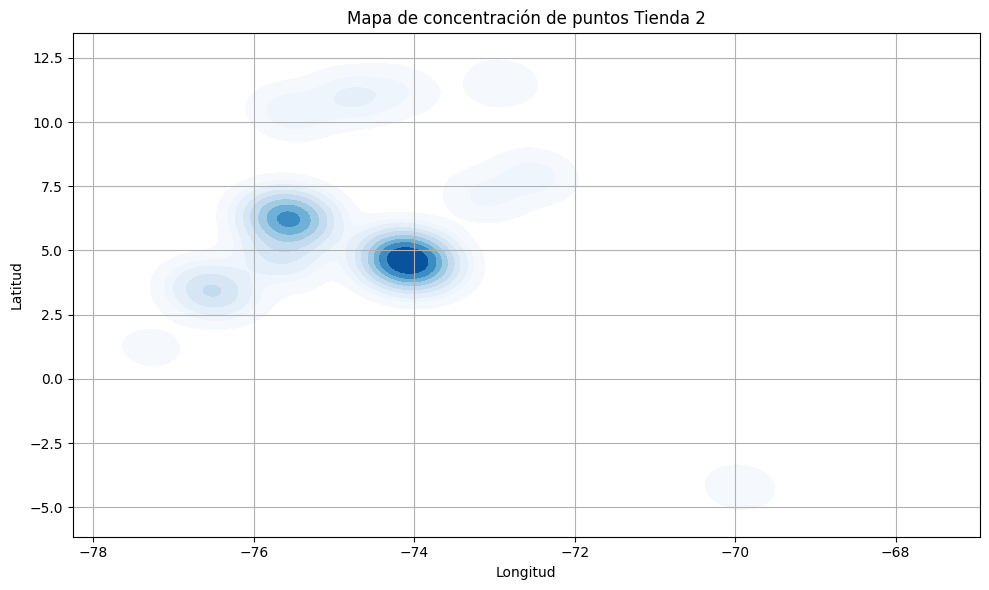

In [81]:
plt.figure(figsize=(10, 6))

# Crear el mapa de calor tipo scatter density
sns.kdeplot(
    data=df_extra2,
    x='lon', y='lat',
    fill=True,          # Relleno del área de densidad
    cmap='Blues',        # Paleta de colores
    #thresh=0.05         # Umbral mínimo para mostrar densidad
)

plt.title("Mapa de concentración de puntos Tienda 2")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()

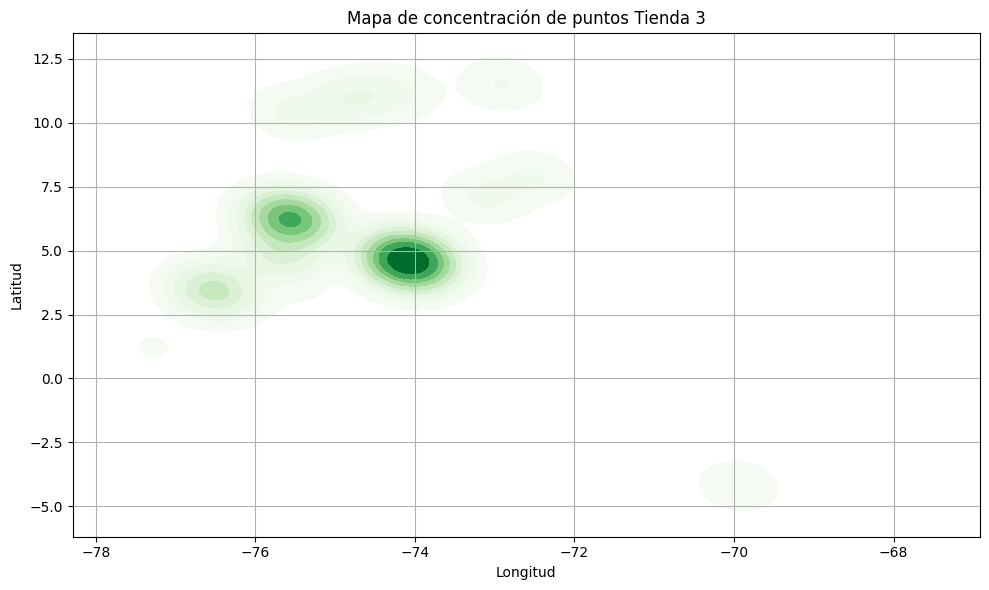

In [72]:
plt.figure(figsize=(10, 6))

# Crear el mapa de calor tipo scatter density
sns.kdeplot(
    data=df_extra3,
    x='lon', y='lat',
    fill=True,          # Relleno del área de densidad
    cmap='Greens',        # Paleta de colores
    thresh=0.05         # Umbral mínimo para mostrar densidad
)

plt.title("Mapa de concentración de puntos Tienda 3")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()

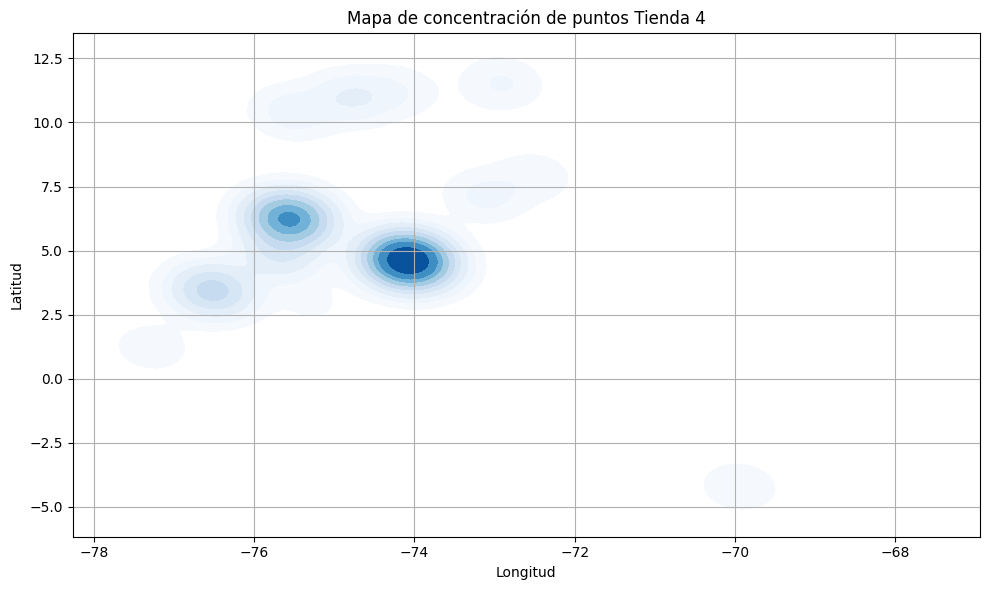

In [73]:
plt.figure(figsize=(10, 6))

# Crear el mapa de calor tipo scatter density
sns.kdeplot(
    data=df_extra4,
    x='lon', y='lat',
    fill=True,          # Relleno del área de densidad
    cmap='Blues',        # Paleta de colores
    thresh=0.05         # Umbral mínimo para mostrar densidad
)

plt.title("Mapa de concentración de puntos Tienda 4")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()

/tmp/ipython-input-74-1272783189.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extra['Tienda'] = 'Tienda 1'
/tmp/ipython-input-74-1272783189.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_extra2['Tienda'] = 'Tienda 2'
/tmp/ipython-input-74-1272783189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_g

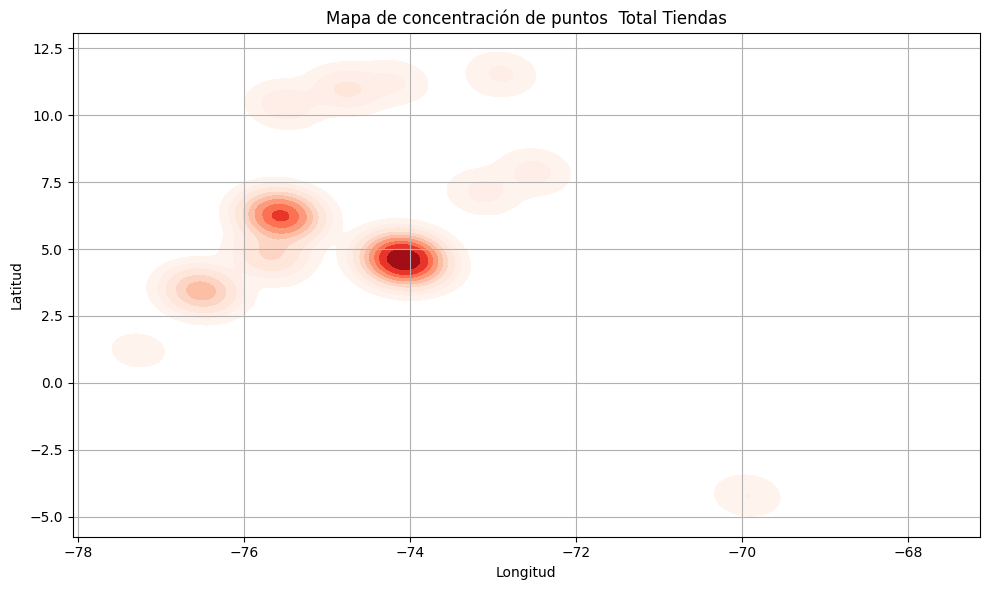

In [74]:
df_extra['Tienda'] = 'Tienda 1'
df_extra2['Tienda'] = 'Tienda 2'
df_extra3['Tienda'] = 'Tienda 3'
df_extra4['Tienda'] = 'Tienda 4'
df_extra_total = pd.concat([df_extra, df_extra2, df_extra3, df_extra4], ignore_index=True)


plt.figure(figsize=(10, 6))

# Crear el mapa de calor tipo scatter density
sns.kdeplot(
    data=df_extra_total,
    x='lon', y='lat',
    fill=True,          # Relleno del área de densidad
    cmap='Reds',        # Paleta de colores
    thresh=0.05         # Umbral mínimo para mostrar densidad
)

plt.title("Mapa de concentración de puntos  Total Tiendas")
plt.xlabel("Longitud")
plt.ylabel("Latitud")
plt.grid(True)
plt.tight_layout()
plt.show()


In [75]:
import folium
from folium.plugins import HeatMap

# Crear mapa centrado en el promedio de coordenadas
mapa = folium.Map(location=[df_extra_total['lat'].mean(), df_extra_total['lon'].mean()], zoom_start=12)
#Esto significa donde va a ir enfocado el mapa una vez lo abramos

# Agregar capa de calor, aqui van todos mis datos
HeatMap(data=df_extra_total[['lat', 'lon']]).add_to(mapa)

# Mostrar mapa en Jupyter o guardar como HTML
mapa.save("mapa_calor.html")

###Análisis en base a lo solicitado:

*   Por Ingresos totales, la tienda 4 es la que presenta menos ingresos de todas, con 1,03 miles de millones de MXN

*  En cuanto a las categorías de producto, las cuatro tiendas presentan un comportamiento similar, no existe una gran diferencia en lo que respecta a el comportamiento de venta de cada tienda.

*   Con respecto a la calificación promedio de cada tienda, la que presenta menor promedio es la Tienda 1, y la que mejor es la Tienda 3. La Tienda 4, es se encuentra en la tercera posición. En este análisis, las brechas no son tan grandes, varían en centésimas.

*   Ahora bien, se detalla en el colab el registro de los productos más y menos vendidos por cada tienda para una futura decisión.
*   Y por último se considera el costo promedio del envío, donde podemos evidenciar que la Tienda 4 tiene el costo de envío más bajo, mientras que la Tienda 1 cuenta con el costo más alto.


*   Además, se realizo un análisis extra sobre la densidad de compra según ubicación geográfica para determinar los patrones de venta de cada tienda, llegando a la conclusión que las cuatro tiendas se comportan de una manera similar.






En esta imagen podemos evidenciar el Head Map de las 4 tiendas y su conportamiento de venta, esto nos serirá para entender en cómo se comporta el mercado.

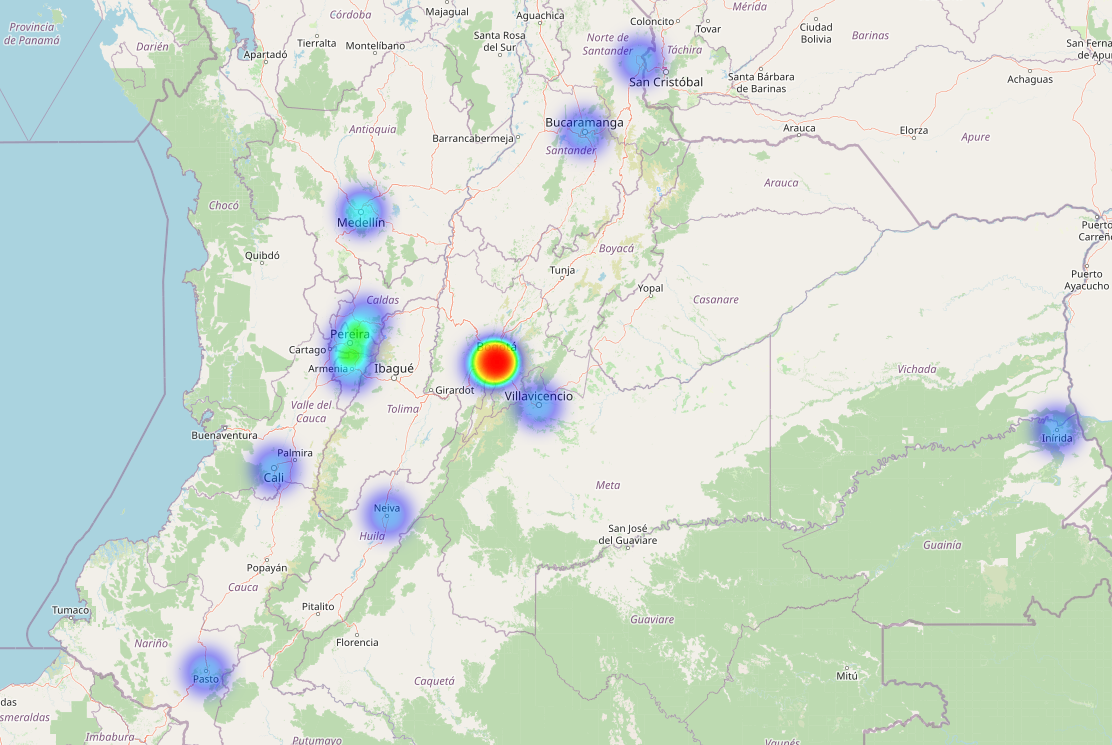